In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("beenusharma42/fraudlent-claim-in-healthcare")

print("Path to dataset files:", path)

100%|██████████| 25.4M/25.4M [00:00<00:00, 129MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/beenusharma42/fraudlent-claim-in-healthcare/versions/1


In [5]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define source and destination paths
source_path = path # 'path' variable is from the previous cell
destination_path = '/content/drive/My Drive/CTS NPN/'

# Create destination directory if it doesn't exist
if not os.path.exists(destination_path):
     os.makedirs(destination_path)

# Copy the dataset to Google Drive
# Since the downloaded item is a directory, we'll use shutil.copytree
try:
     shutil.copytree(source_path, destination_path, dirs_exist_ok=True)
     print(f"Dataset successfully copied to {destination_path}")
except Exception as e:
     print(f"Error copying dataset: {e}")

Mounted at /content/drive
Dataset successfully copied to /content/drive/My Drive/CTS NPN/


In [6]:
import pandas as pd
import numpy as np

## Inpatient Data

In [7]:
df_inpatient = pd.read_csv('/content/drive/MyDrive/CTS NPN/Train_Inpatientdata-1542865627584.csv')
df_inpatient.shape

(40474, 30)

In [8]:
df_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [9]:
df_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [10]:
df_inpatient.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [11]:
df_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [12]:
df_inpatient['In/out'] = 'I'
df_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In/out
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,I
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,I
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,I


## Outpatient Data

In [13]:
df_outpatient = pd.read_csv('/content/drive/MyDrive/CTS NPN/Train_Outpatientdata-1542865627584.csv')
df_outpatient.shape

(517737, 27)

In [14]:
df_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [15]:
df_outpatient['In/out'] = 'O'
df_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,In/out
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,O
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,O
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,O
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,O
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,O


## Beneficiary Data

In [16]:
df_beneficiary = pd.read_csv('/content/drive/MyDrive/CTS NPN/Train_Beneficiarydata-1542865627584.csv')
df_beneficiary.shape

(138556, 25)

In [17]:
df_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [18]:
df_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

## Provider data

In [19]:
df_provider = pd.read_csv('/content/drive/MyDrive/CTS NPN/Train-1542865627584.csv')
df_provider.shape

(5410, 2)

In [20]:
df_provider.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


## Merging two datasets - Inpatient and Outpatient

In [21]:
df_in_out = pd.concat([df_inpatient, df_outpatient], ignore_index=True)
df_in_out.tail()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In/out
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O
558210,BENE159198,CLM686139,2009-11-17,2009-11-18,PRV53689,80,PHY419379,NaN,PHY419379,NaN,...,V103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O


In [22]:
df_in_out.shape

(558211, 31)

In [23]:
df_in_out.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,1508
OperatingPhysician,443764
OtherPhysician,358475
AdmissionDt,517737


In [24]:
df_in_out=df_in_out.drop_duplicates()
df_in_out.shape

(558211, 31)

## Merging inpatient+outpatient with beneficiar data set as left join using beneID

In [25]:
df_in_out_bene = df_in_out.merge(df_beneficiary, on="BeneID", how="left")
df_in_out_bene.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,2,1,2,2,2,21260,2136,120,100


In [26]:
df_in_out_bene.shape

(558211, 55)

### 24 columns newly added. Since 1 is for beneID

In [27]:
df_in_out_bene.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,1508
OperatingPhysician,443764
OtherPhysician,358475
AdmissionDt,517737


In [28]:
df_in_out_bene['AttendingPhysician'].nunique()

82063

In [29]:
df_in_out_bene['OperatingPhysician'].unique()

array([nan, 'PHY318495', 'PHY392961', ..., 'PHY398440', 'PHY393100',
       'PHY399127'], dtype=object)

In [30]:
df_final = df_in_out_bene.merge(df_provider, on="Provider", how="left")
df_final.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


In [31]:
df_final.shape

(558211, 56)

In [32]:
df_final.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,1508
OperatingPhysician,443764
OtherPhysician,358475
AdmissionDt,517737


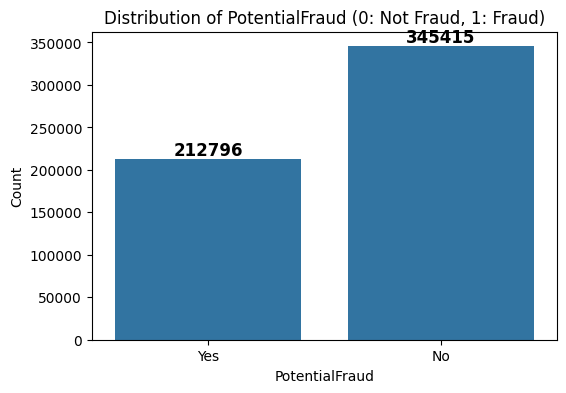

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
ax = sns.countplot(x='PotentialFraud', data=df_final)
plt.title('Distribution of PotentialFraud (0: Not Fraud, 1: Fraud)')
plt.xlabel('PotentialFraud')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()


## Moderate class imbalance

In [34]:
# Feature engineering

df_final["ClaimStartDt"] = pd.to_datetime(df_final["ClaimStartDt"])
df_final["ClaimEndDt"] = pd.to_datetime(df_final["ClaimEndDt"])

df_final["ClaimDuration"] = (df_final["ClaimEndDt"] - df_final["ClaimStartDt"]).dt.days
df_final[["ClaimStartDt", "ClaimEndDt", "ClaimDuration"]].head()

,ClaimStartDt,ClaimEndDt,ClaimDuration
0,2009-04-12,2009-04-18,6
1,2009-08-31,2009-09-02,2
2,2009-09-17,2009-09-20,3
3,2009-02-14,2009-02-22,8
4,2009-08-13,2009-08-30,17


In [35]:
# Ensure date columns are in datetime format
df_final['AdmissionDt'] = pd.to_datetime(df_final['AdmissionDt'], errors='coerce')
df_final['DischargeDt'] = pd.to_datetime(df_final['DischargeDt'], errors='coerce')

# Calculate duration in days (fill NaN with 0)
df_final['patient_duration_period'] = (df_final['DischargeDt'] - df_final['AdmissionDt']).dt.days
df_final['patient_duration_period'] = df_final['patient_duration_period'].fillna(0).astype(int)

df_final[['AdmissionDt','DischargeDt','patient_duration_period']]

# we can add one more column to tell if it is inpaitinent or not like binary class

,AdmissionDt,DischargeDt,patient_duration_period
0,2009-04-12,2009-04-18,6
1,2009-08-31,2009-09-02,2
2,2009-09-17,2009-09-20,3
3,2009-02-14,2009-02-22,8
4,2009-08-13,2009-08-30,17
...,...,...,...
558206,NaT,NaT,0
558207,NaT,NaT,0
558208,NaT,NaT,0
558209,NaT,NaT,0


In [36]:
df_final.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,1508
OperatingPhysician,443764
OtherPhysician,358475
AdmissionDt,517737


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            145899 non-

In [38]:
df_final['PotentialFraud'] = df_final['PotentialFraud'].map({'Yes': 1, 'No': 0})

In [39]:
df_final['PotentialFraud'].unique()

array([1, 0])

In [40]:
df_final.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,1508
OperatingPhysician,443764
OtherPhysician,358475
AdmissionDt,517737


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            145899 non-

In [42]:
def frequency_encoding(df, col):
    freq_map = df[col].value_counts().to_dict()
    df[col + '_freq'] = df[col].map(freq_map)
    df[col + "_freq"] = df[col + "_freq"].fillna(0)
    return df, freq_map

def fraud_probability_encoding(df, col, target_col='PotentialFraud'):
    # Compute fraud probability for each physician
    prob_map = df.groupby(col)[target_col].mean().to_dict()
    df[col + '_fraud_prob'] = df[col].map(prob_map)

    # Replace NaN (unseen or null physicians) with 0
    df[col + '_fraud_prob'] = df[col + '_fraud_prob'].fillna(0)
    return df, prob_map


# Example usage:
df_final, attending_freq_map = frequency_encoding(df_final, 'AttendingPhysician')
df_final, attending_prob_map = fraud_probability_encoding(df_final, 'AttendingPhysician')

# Do the same for OperatingPhysician and OtherPhysician
df_final, op_freq_map = frequency_encoding(df_final, 'OperatingPhysician')
df_final, op_prob_map = fraud_probability_encoding(df_final, 'OperatingPhysician')

df_final, oth_freq_map = frequency_encoding(df_final, 'OtherPhysician')
df_final, oth_prob_map = fraud_probability_encoding(df_final, 'OtherPhysician')

## Frequency Encoding
Replace each physician code with how many times they appear in the dataset.
Example: AttendingPhysician = PHY123 appears in 500 claims → encode as 500.

Fraudulent frequency can also be computed: % of fraud claims for that physician.

## Target Encoding
Map each physician ID to the probability of fraud given past claims.
Example: if Dr. X has 100 claims, 20 fraud → encode as 0.20.

In [43]:
df_final.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualDeductibleAmt,PotentialFraud,ClaimDuration,patient_duration_period,AttendingPhysician_freq,AttendingPhysician_fraud_prob,OperatingPhysician_freq,OperatingPhysician_fraud_prob,OtherPhysician_freq,OtherPhysician_fraud_prob
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,70,1,6,6,1.0,1.0,0.0,0.0,0.0,0.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,70,0,2,2,2.0,0.0,1.0,0.0,0.0,0.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,70,0,3,3,5.0,0.0,0.0,0.0,5.0,0.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,320,0,8,8,35.0,0.0,2.0,0.0,4.0,0.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,100,0,17,17,2.0,0.0,4.0,0.0,0.0,0.0


In [44]:
pd.set_option('display.max_rows', None)    # Show all rows

In [45]:
df_final.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,1508
OperatingPhysician,443764
OtherPhysician,358475
AdmissionDt,517737


## Creating new features from DOB and DOD

In [46]:
df_final['is_dead'] = df_final['DOD'].notnull().astype(int) # fraudulent claims can filed after the patient's death.
df_final["DOB"] = pd.to_datetime(df_final["DOB"])
df_final['AgeAtClaim'] = (df_final['ClaimStartDt'] - df_final['DOB']).dt.days // 365 # To catch abnormal claims
df_final.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClaimDuration,patient_duration_period,AttendingPhysician_freq,AttendingPhysician_fraud_prob,OperatingPhysician_freq,OperatingPhysician_fraud_prob,OtherPhysician_freq,OtherPhysician_fraud_prob,is_dead,AgeAtClaim
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,6,6,1.0,1.0,0.0,0.0,0.0,0.0,0,66
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,2,2,2.0,0.0,1.0,0.0,0.0,0.0,0,66
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,3,3,5.0,0.0,0.0,0.0,5.0,0.0,0,66
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,8,8,35.0,0.0,2.0,0.0,4.0,0.0,0,95
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,17,17,2.0,0.0,4.0,0.0,0.0,0.0,0,71


In [47]:
df_final['DeductibleAmtPaid'] = df_final['DeductibleAmtPaid'].fillna(0) # cashless claims are represented as zero

df_final['is_cashless_claim'] = np.where((df_final['DeductibleAmtPaid'] == 0) &
                                   (df_final['InscClaimAmtReimbursed'] > 0), 1, 0)
df_final['is_rejected_claim'] = np.where((df_final['DeductibleAmtPaid'] == 0) &
                                   (df_final['InscClaimAmtReimbursed'] == 0), 1, 0)

In [48]:
# Export the final dataframe to a CSV file
df_final.to_csv('/content/drive/MyDrive/CTS NPN/final_healthcare_data.csv', index=False)

print("Final dataset exported to Google Drive.")

Final dataset exported to Google Drive.
